### **Iris Dataset**

The Iris dataset is a multivariate dataset introduced by British biologist and statistician Ronald A. Fisher in 1936.

#### **Dataset Characteristics:**
- **Samples**: 150
- **Features**: 4 continuous variables
- **Classes**: 3 (Species of Iris flowers)


#### **Columns:**
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)
- Species of Iris Flower:
  - **Setosa**
    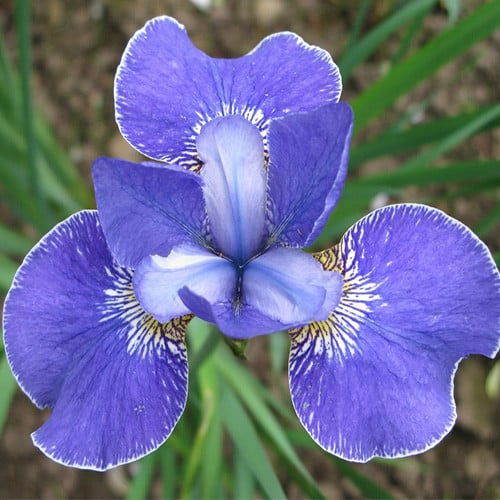
    
  - **Versicolor**
    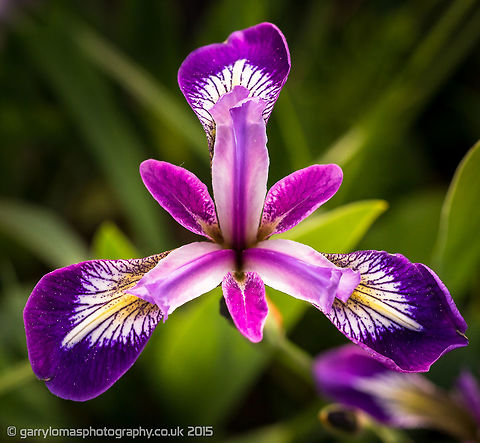
  - **Virginica**
    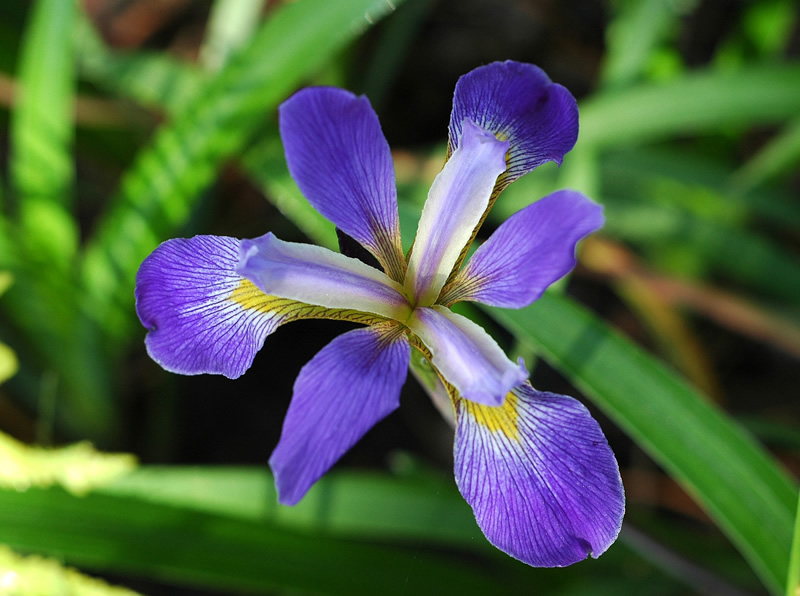


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import npstat

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


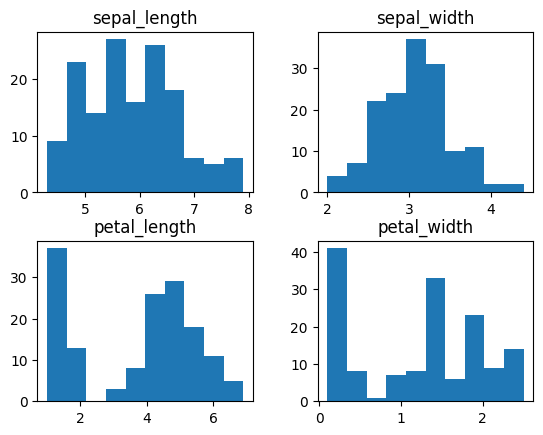

In [3]:
iris.hist(grid=False);

In [4]:
print('Data Distribution')
print('')
for col in iris.columns[:-1]:
    print(f"{col} Distribution:")
    shapiro, p_val = scipy.stats.shapiro(iris[col])
    print(f'Skewness: {scipy.stats.skew(iris[col])}')
    print(f'Kurtosis: {scipy.stats.kurtosis(iris[col])}')
    print(f"Shapiro P Value: {p_val}")
    print('-' * 60)

Data Distribution

sepal_length Distribution:
Skewness: 0.3117530585022963
Kurtosis: -0.5735679489249765
Shapiro P Value: 0.010181161454691156
------------------------------------------------------------
sepal_width Distribution:
Skewness: 0.31576710633893473
Kurtosis: 0.18097631752246768
Shapiro P Value: 0.10115426916130282
------------------------------------------------------------
petal_length Distribution:
Skewness: -0.2721276664567214
Kurtosis: -1.3955358863990055
Shapiro P Value: 7.412263135173186e-10
------------------------------------------------------------
petal_width Distribution:
Skewness: -0.10193420656560036
Kurtosis: -1.336067405231553
Shapiro P Value: 1.680465210314913e-08
------------------------------------------------------------


### Normality Test & Distribution Shape Ranges

- **Shapiro-Wilk Test**:  
  -  *p-value > 0.05*:  Normally distributed 
  -  *p-value ≤ 0.05*: Not normally distributed

- **Skewness**:
  -  |Skewness| < 0.5: Nearly symmetric  
  -   0.5 ≤ |Skewness| < 1: Moderate skew  
  -  |Skewness| ≥ 1: Highly skewed

- **Kurtosis** :
  -  Between -0.5 and 0.5: Mesokurtic (normal-like)  
  -   Between -1 and -0.5 or 0.5 and 1: Slightly platykurtic/leptokurtic  
  -  < -1 or > 1: Strongly platykurtic (flat) or leptokurtic (peaked)

---

### Distribution of Petal Length

| **Test / Metric**       | **Result**             | **Interpretation**                    |
|-------------------------|------------------------|----------------------------------------|
| **Shapiro-Wilk**        | p-value ≈ 7.4e-10      |  Not normally distributed             |
| **Skewness**            | ≈ -0.27                |  Nearly symmetric                     |
| **Kurtosis**            | ≈ -1.40                |  light tails      |

---

### Distribution of Petal Width

| **Test / Metric**       | **Result**             | **Interpretation**                    |
|-------------------------|------------------------|----------------------------------------|
| **Shapiro-Wilk**        | p-value ≈ 1.68e-08     |  Not normally distributed             |
| **Skewness**            | ≈ -0.10                |  Nearly symmetric                     |
| **Kurtosis**            | ≈ -1.34                |  light tails     |

---

### Distribution of Sepal Length

| **Test / Metric**       | **Result**             | **Interpretation**                    |
|-------------------------|------------------------|----------------------------------------|
| **Shapiro-Wilk**        | p-value ≈ 0.0102       |  Not normally distributed             |
| **Skewness**            | ≈ 0.31                 |  Mild right skew                      |
| **Kurtosis**            | ≈ -0.57                |  light tails                 |

---

### Distribution of Sepal Width

| **Test / Metric**       | **Result**             | **Interpretation**                    |
|-------------------------|------------------------|----------------------------------------|
| **Shapiro-Wilk**        | p-value ≈ 0.101        |  Normally distributed   |
| **Skewness**            | ≈ 0.32                 |  Mild right skew                      |
| **Kurtosis**            | ≈ 0.18                 |  Normal tails      |


In [5]:
setosa_petals = iris[iris['species'] == 'setosa']['petal_length']
print(scipy.stats.shapiro(setosa_petals))
print(scipy.stats.skew(setosa_petals))
print(scipy.stats.kurtosis(setosa_petals))

ShapiroResult(statistic=np.float64(0.9549767850318988), pvalue=np.float64(0.0548114671955363))
0.10317510576481272
0.8045921154263223


### Distribution of Setosa Petals Length

| **Metric**     | **Value**        | **Interpretation**                             |
|----------------|------------------|-------------------------------------------------|
| **Shapiro**    | p ≈ 0.055        | Normal                                        |
| **Skewness**   | ≈ 0.10           | Symmetric                                     |
| **Kurtosis**   | ≈ 0.80           | Slight tails           |


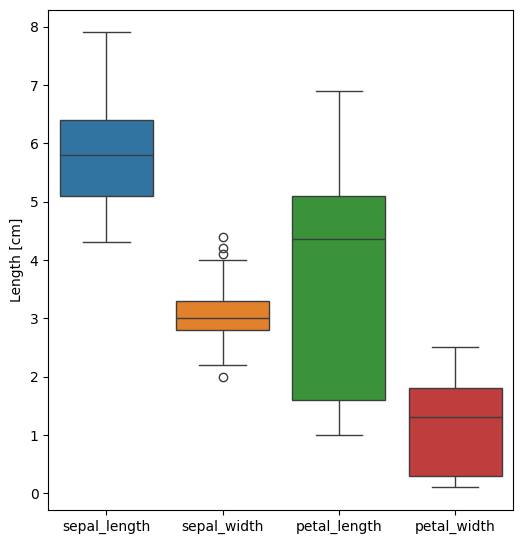

In [6]:
fig = plt.figure(figsize=(6, 6.5))
sns.boxplot(iris)
plt.ylabel('Length [cm]');

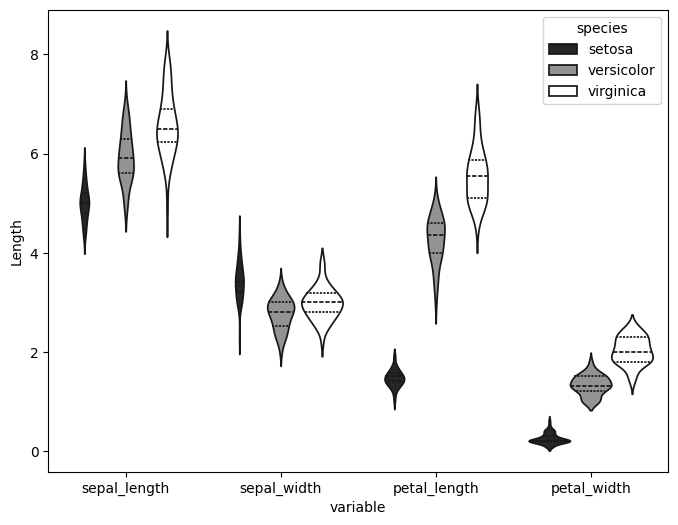

In [7]:
box_plot = pd.melt(frame=iris, id_vars='species', value_name='Length', value_vars=iris.iloc[:,:-1] )
fig = plt.figure(figsize=(8, 6))
sns.violinplot(x='variable', y='Length', hue='species', data=box_plot, inner="quartile", palette='dark:white');

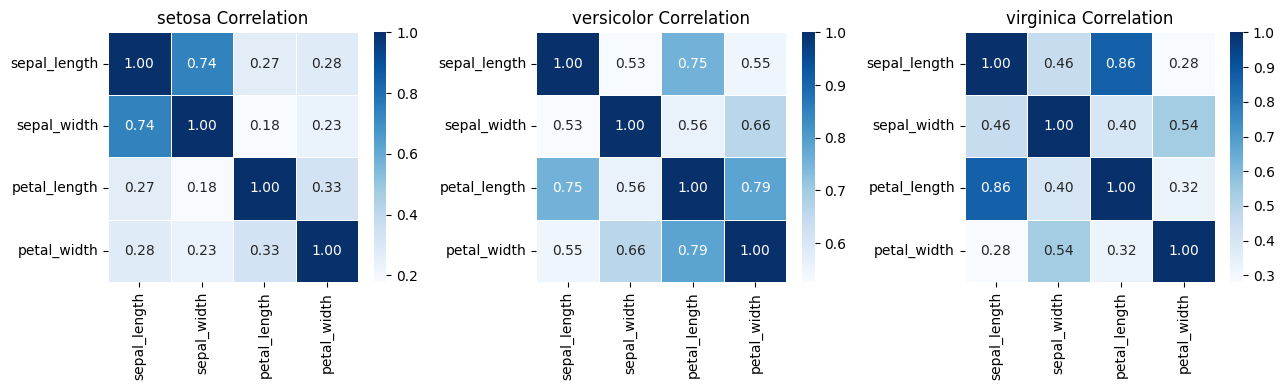

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

for ax, species in zip(axes, iris['species'].unique()):
    corr = iris[iris['species'] == species].iloc[:, :4].corr()
    sns.heatmap(corr, cmap='Blues', linewidths=0.5, fmt='.2f', annot=True, ax=ax)
    ax.set_title(f'{species} Correlation')

plt.tight_layout()
plt.show()

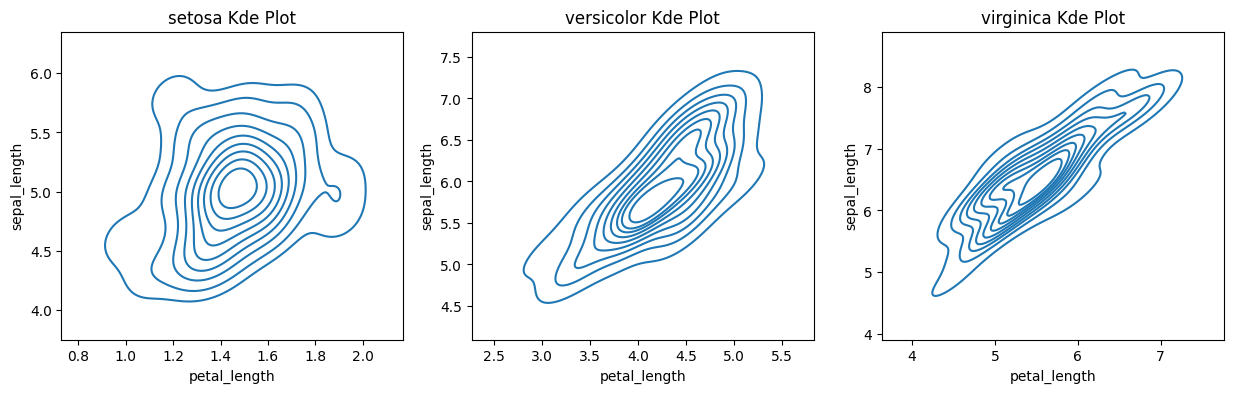

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, species in zip(axes, iris['species'].unique()):
    sns.kdeplot(data=iris[iris['species'] == species], x='petal_length', y='sepal_length', ax=ax)
    ax.set_title(f'{species} Kde Plot')

# ANOVA

In [10]:
npstat.anova(iris, iris.columns[:-1], 'species')

,F-Statistics,p-value
sepal_length,119.264502,0.000000
sepal_width,49.160040,0.000000
petal_length,1180.161182,0.000000
petal_width,960.007147,0.000000


In [11]:
for col in iris.columns[:-1]:
    tukey = pairwise_tukeyhsd(endog=iris[col], groups=iris['species'])
    print(f'{col} Tukeys HSD Test')
    print(tukey)
    print("_" * 100)

sepal_length Tukeys HSD Test
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------
____________________________________________________________________________________________________
sepal_width Tukeys HSD Test
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------
_________